### Stock Price Prediction

**Dataset**: We sill be using hostorical dataset of reliance industries stock traded on NSE, data fecthed from the following webpage https://in.finance.yahoo.com/quote/RELIANCE.NS/history/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
#loading data
data = pd.read_csv('/Users/Admin/jupyter/Self Study files/Stock Price prediction using LSTM/Dataset/RELIANCE.NS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.412877,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.394122,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.412292,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.390007,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.373594,76213503.0


In [74]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6117,2020-04-03,1134.449951,1134.449951,1056.300049,1077.449951,1077.449951,18911970.0
6118,2020-04-07,1102.099976,1214.000000,1100.000000,1206.099976,1206.099976,24857792.0
6119,2020-04-08,1180.000000,1229.000000,1160.000000,1192.150024,1192.150024,22803609.0
6120,2020-04-09,1214.000000,1232.800049,1193.000000,1219.949951,1219.949951,15101511.0
6121,2020-04-13,1203.949951,1215.000000,1180.000000,1189.150024,1189.150024,10822858.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6122 entries, 0 to 6121
Data columns (total 7 columns):
Date         6122 non-null object
Open         5996 non-null float64
High         5996 non-null float64
Low          5996 non-null float64
Close        5996 non-null float64
Adj Close    5996 non-null float64
Volume       5996 non-null float64
dtypes: float64(6), object(1)
memory usage: 334.9+ KB


Data has 6122 rows and 7 columns. 'Date' column is of data type object.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5996.0,3.644362e+02,3.532911e+02,11.948700,4.966930e+01,3.690000e+02,5.091250e+02,1.615000e+03
High,5996.0,3.691009e+02,3.572384e+02,12.557900,5.040340e+01,3.738750e+02,5.149312e+02,1.617550e+03
Low,5996.0,3.593516e+02,3.488357e+02,11.874600,4.864042e+01,3.643000e+02,5.025312e+02,1.596100e+03
Close,5996.0,3.640363e+02,3.528509e+02,12.003400,4.944475e+01,3.696500e+02,5.082375e+02,1.609950e+03
Adj Close,5996.0,3.288207e+02,3.527672e+02,1.802476,2.402459e+01,3.234485e+02,4.561427e+02,1.609950e+03
Volume,5996.0,3.143451e+07,5.046041e+07,0.000000,7.185846e+06,1.371650e+07,3.422527e+07,6.623833e+08


In [6]:
#Check for missing values
data.isnull().sum()

Date           0
Open         126
High         126
Low          126
Close        126
Adj Close    126
Volume       126
dtype: int64

We see that there are 126 rows having missing values. We will check for which date are the values missing as Dat column has no missing data.

In [7]:
data[data.isnull().any(axis=1)].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3582,2009-12-30,NaN,NaN,NaN,NaN,NaN,NaN
3583,2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
3608,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
4086,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
4125,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
4255,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
4297,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
4634,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
4863,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
6008,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


On checking the NSE list of holidays, we see that the rows having missing values were not holidays for NSE, so cannot delete those entries. Hence, we will replace the missing values with previous days' values.

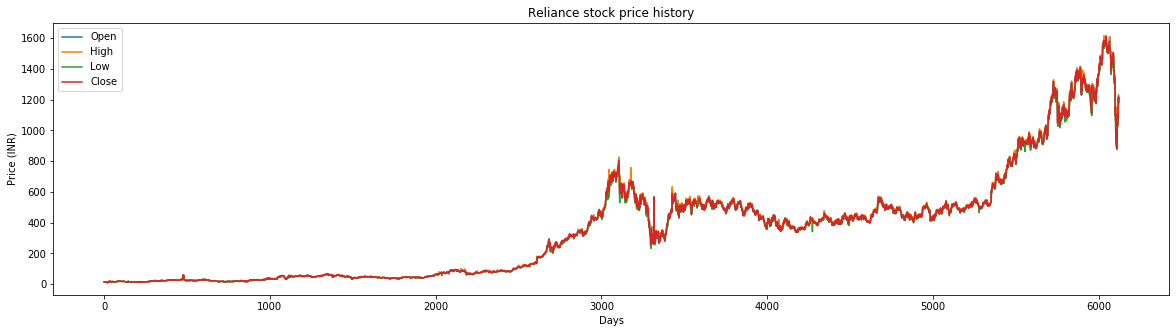

In [75]:
plt.figure(figsize=(20,5))
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
plt.plot(data["Close"])
plt.title('Reliance stock price history')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

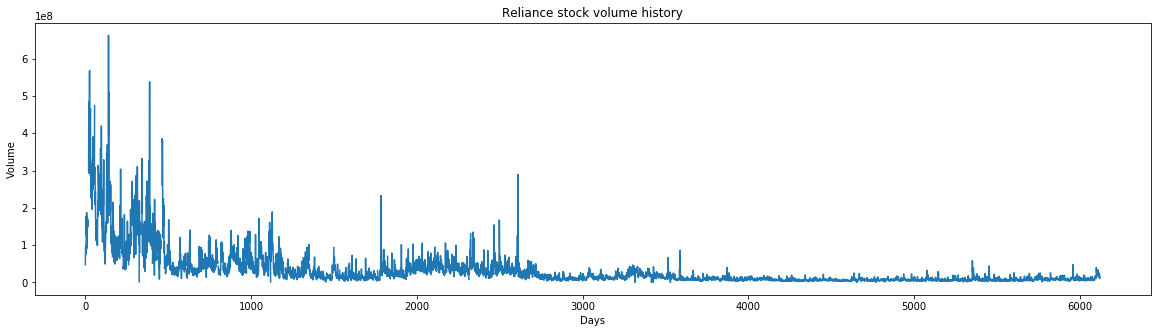

In [76]:
#Volume chart
plt.figure(figsize=(20,5))
plt.plot(data["Volume"])
plt.title('Reliance stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [8]:
train_set=data[data['Date']<'2019-01-01'].copy()
train_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.068300,2.412877,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.943400,2.394122,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.064400,2.412292,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.916000,2.390007,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.806700,2.373594,76213503.0
...,...,...,...,...,...,...,...
5805,2018-12-24,1100.900024,1103.199951,1086.550049,1089.150024,1083.151733,4144535.0
5806,2018-12-26,1085.800049,1100.000000,1065.650024,1098.349976,1092.301025,7210059.0
5807,2018-12-27,1107.199951,1127.000000,1104.000000,1120.199951,1114.030640,12478000.0
5808,2018-12-28,1125.500000,1135.250000,1121.199951,1125.550049,1119.351318,7666016.0


In [9]:
test_set=data[data['Date']>'2019-01-01'].copy()
test_set

,Date,Open,High,Low,Close,Adj Close,Volume
5811,2019-01-02,1114.500000,1127.000000,1101.000000,1106.400024,1100.306763,7144970.0
5812,2019-01-03,1107.500000,1114.599976,1090.099976,1092.750000,1086.731934,7446457.0
5813,2019-01-04,1097.400024,1104.449951,1081.099976,1098.650024,1092.599487,8465141.0
5814,2019-01-07,1107.000000,1118.449951,1101.000000,1104.750000,1098.665771,5513559.0
5815,2019-01-08,1105.099976,1109.949951,1096.000000,1104.650024,1098.566406,5625153.0
...,...,...,...,...,...,...,...
6117,2020-04-03,1134.449951,1134.449951,1056.300049,1077.449951,1077.449951,18911970.0
6118,2020-04-07,1102.099976,1214.000000,1100.000000,1206.099976,1206.099976,24857792.0
6119,2020-04-08,1180.000000,1229.000000,1160.000000,1192.150024,1192.150024,22803609.0
6120,2020-04-09,1214.000000,1232.800049,1193.000000,1219.949951,1219.949951,15101511.0


In [10]:
#dropping date and adj close from training set
train_set=train_set.drop(['Date','Adj Close'], axis=1)
train_set.head()

,Open,High,Low,Close,Volume
0,16.009800,16.095699,15.904300,16.0683,47600787.0
1,16.029301,16.107401,15.826200,15.9434,77143764.0
2,16.205000,16.943001,16.029301,16.0644,95695836.0
3,15.912100,15.962900,15.701300,15.9160,99159504.0
4,15.853600,15.853600,15.670000,15.8067,76213503.0


In [11]:
#Normalization
scaler=MinMaxScaler()
train_set=scaler.fit_transform(train_set)
train_set

array([[0.0031135 , 0.00268739, 0.00314053, 0.00311011, 0.0718629 ],
       [0.00312845, 0.00269628, 0.00307967, 0.00301454, 0.11646393],
       [0.00326315, 0.00333102, 0.00323795, 0.00310712, 0.14447199],
       ...,
       [0.83969036, 0.84655611, 0.85114471, 0.84789551, 0.01883804],
       [0.85372036, 0.852823  , 0.86454944, 0.85198894, 0.01157338],
       [0.85789864, 0.85175951, 0.86065271, 0.84869892, 0.01090429]])

In [12]:
X_train=[]
y_train=[]

In [14]:
train_set.shape

(5810, 5)

In [15]:
for i in range(60, train_set.shape[0]):
    X_train.append(train_set[i-60:i])
    y_train.append(train_set[i,0])

In [16]:
X_train,y_train=np.array(X_train), np.array(y_train)

In [17]:
X_train.shape, y_train.shape

((5750, 60, 5), (5750,))

In [19]:
###Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [30]:
# reg_model=Sequential()
# reg_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],5)))
# reg_model.add(Dropout(0.2))

# reg_model.add(LSTM(units=60, activation='relu', return_sequences=True))
# reg_model.add(Dropout(0.3))

# reg_model.add(LSTM(units=80, activation='relu', return_sequences=True))
# reg_model.add(Dropout(0.4))

# reg_model.add(LSTM(units=120, activation='relu', return_sequences=True))
# reg_model.add(Dropout(0.5))

# reg_model.add(Dense(units=1))

In [89]:
BATCH_SIZE=50
TIME_STEPS=60

reg_model = Sequential()
reg_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True))

#reg_model.add(LSTM(100, batch_input_shape=(X_train.shape[1],5), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
reg_model.add(Dropout(0.5))
reg_model.add(Dense(20,activation='relu'))
reg_model.add(Dense(1,activation='sigmoid'))

In [90]:
reg_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (50, 100)                 42400     
_________________________________________________________________
dropout_13 (Dropout)         (50, 100)                 0         
_________________________________________________________________
dense_5 (Dense)              (50, 20)                  2020      
_________________________________________________________________
dense_6 (Dense)              (50, 1)                   21        
Total params: 44,441
Trainable params: 44,441
Non-trainable params: 0
_________________________________________________________________


In [32]:
#1st attempt
# reg_model.compile(optimizer='adam', loss='mse')

# #also try the following:  Also note that you are using the softmax activation, 
# #and in that case you should prefer to use the categorical_crossentropy loss.

# #To use binary_crossentropy for binary classification, you should have units = 1, sigmoid activation,
# #and labels should be (1062, 1) or (1062,), which means they are 0-1 encoded.


In [91]:
# 2nd attempt
reg_model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [93]:
reg_model.fit(X_train,y_train,epochs=30, batch_size=BATCH_SIZE)

Train on 5750 samples
Epoch 1/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 2/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 3/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 4/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 5/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 6/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 7/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 8/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 9/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 10/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 11/30
5750/5750 [==============================] - 6s 1ms/sample - loss: nan
Epoch 12/30
5750/5750 [==============================] - 6s 1ms/sample - l

In [94]:
#Prepare test data
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5811,2019-01-02,1114.500000,1127.000000,1101.000000,1106.400024,1100.306763,7144970.0
5812,2019-01-03,1107.500000,1114.599976,1090.099976,1092.750000,1086.731934,7446457.0
5813,2019-01-04,1097.400024,1104.449951,1081.099976,1098.650024,1092.599487,8465141.0
5814,2019-01-07,1107.000000,1118.449951,1101.000000,1104.750000,1098.665771,5513559.0
5815,2019-01-08,1105.099976,1109.949951,1096.000000,1104.650024,1098.566406,5625153.0


In [95]:
test_set.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
6062,2020-01-14,1540.000000,1550.000000,1521.849976,1529.400024,1529.400024,7230788.0
6063,2020-01-15,1535.849976,1539.900024,1518.250000,1523.849976,1523.849976,7231393.0
6064,2020-01-16,1529.000000,1543.349976,1528.000000,1537.900024,1537.900024,5873662.0
6065,2020-01-17,1553.500000,1584.949951,1553.199951,1581.000000,1581.000000,13469708.0
6066,2020-01-20,1609.000000,1609.000000,1526.400024,1532.349976,1532.349976,14878868.0
6067,2020-01-21,1528.599976,1545.849976,1522.000000,1533.900024,1533.900024,8650831.0
6068,2020-01-22,1544.000000,1546.750000,1531.099976,1533.349976,1533.349976,4719245.0
6069,2020-01-23,1536.500000,1541.949951,1520.699951,1526.849976,1526.849976,5142088.0
6070,2020-01-24,1527.000000,1536.349976,1518.550049,1521.550049,1521.550049,6687633.0
6071,2020-01-27,1514.900024,1524.449951,1505.000000,1506.550049,1506.550049,6120429.0


In [96]:
last_60_days=test_set.tail(60)

In [97]:
df=last_60_days.append(test_set, ignore_index=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,1540.000000,1550.000000,1521.849976,1529.400024,1529.400024,7230788.0
1,2020-01-15,1535.849976,1539.900024,1518.250000,1523.849976,1523.849976,7231393.0
2,2020-01-16,1529.000000,1543.349976,1528.000000,1537.900024,1537.900024,5873662.0
3,2020-01-17,1553.500000,1584.949951,1553.199951,1581.000000,1581.000000,13469708.0
4,2020-01-20,1609.000000,1609.000000,1526.400024,1532.349976,1532.349976,14878868.0
...,...,...,...,...,...,...,...
366,2020-04-03,1134.449951,1134.449951,1056.300049,1077.449951,1077.449951,18911970.0
367,2020-04-07,1102.099976,1214.000000,1100.000000,1206.099976,1206.099976,24857792.0
368,2020-04-08,1180.000000,1229.000000,1160.000000,1192.150024,1192.150024,22803609.0
369,2020-04-09,1214.000000,1232.800049,1193.000000,1219.949951,1219.949951,15101511.0


In [98]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1540.000000,1550.000000,1521.849976,1529.400024,7230788.0
1,1535.849976,1539.900024,1518.250000,1523.849976,7231393.0
2,1529.000000,1543.349976,1528.000000,1537.900024,5873662.0
3,1553.500000,1584.949951,1553.199951,1581.000000,13469708.0
4,1609.000000,1609.000000,1526.400024,1532.349976,14878868.0


In [112]:
#normalize
input=scaler.fit_transform(df)
input

array([[0.89267315, 0.89880901, 0.89693941, 0.8890344 , 0.07491428],
       [0.88673437, 0.8836791 , 0.89194256, 0.88138865, 0.07492803],
       [0.87693188, 0.88884718, 0.90547577, 0.900744  , 0.04406208],
       ...,
       [0.37750428, 0.41794619, 0.39468387, 0.4244387 , 0.42893871],
       [0.42615912, 0.42363872, 0.44048858, 0.46273589, 0.25384321],
       [0.41177725, 0.39697398, 0.4224443 , 0.4203059 , 0.15657453]])

In [113]:
X_test=[]
y_test=[]

In [114]:
for i in range(60, input.shape[0]):
    X_test.append(input[i-60:i])
    y_test.append(input[i, 0])

In [115]:
X_test, y_test= np.array(X_test), np.array(y_test)

In [116]:
X_test.shape, y_test.shape

((311, 60, 5), (311,))

In [117]:
#Prediction
y_pred=reg_model.predict(X_test)
#y_pred

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 311 samples

In [62]:
y_pred.shape

(311, 60, 1)

In [70]:
n=0
y_pred=y_pred[:,:,n]
y_pred=y_pred.mean(axis=-1)
y_pred=y_pred.max(axis=-1)

IndexError: too many indices for array

In [64]:
#down scaling
scaler.scale_

array([1.43102464e-03, 1.49801502e-03, 1.38802147e-03, 1.37760029e-03,
       2.27334810e-08])

In [65]:
scale=1/1.43102464e-03
scale

698.7999871197187

In [66]:
y_pred=y_pred*scale
y_test=y_test*scale

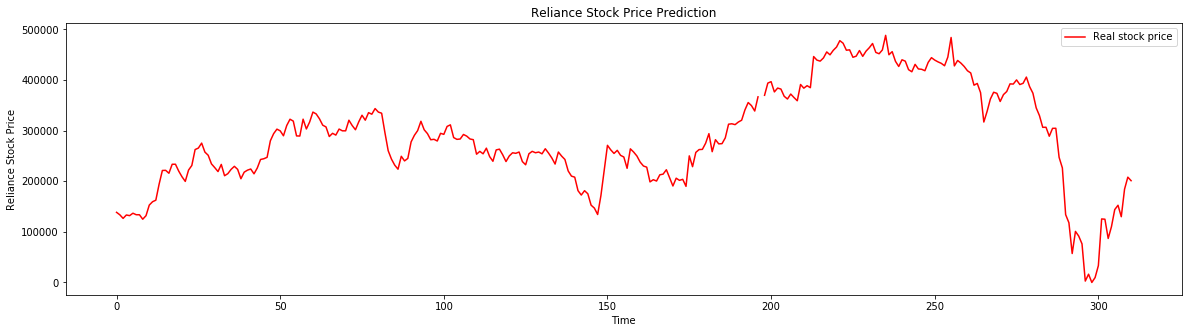

In [71]:
##Visualization of results
plt.figure(figsize=(20,5))
plt.plot(y_test, color='red', label='Real stock price')
#plt.plot(y_pred, color='Blue', label='Predicted price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()